**Import Dataset**

In [2]:
import pandas as pd

wine_df = pd.read_csv("C:/Users/Youn Kyeong/Dropbox/Brown_DSI/DATA1030/wine_ratings/data/winemag-data-130k-v2.csv")

**Data Manipulation**

In [3]:
# Extracted "year" from title 

wine_df['year'] = wine_df.loc[:,'title'].str.extract(r'(\d+)')
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [4]:
wine_df.shape

(129971, 15)

In [5]:
wine_df['taster_name'].nunique()

19

In [6]:
## leave year 1900-2021
import numpy as np

for i in range(len(wine_df)):
    if pd.isnull(wine_df['year'][i]) == True:
        wine_df['year'][i] = np.nan
    else:
        wine_df['year'][i] = int(wine_df['year'][i])
        if (wine_df['year'][i] < 1900) or (wine_df['year'][i] > 2021):
            wine_df['year'][i] = np.nan

<ipython-input-6-29b92d7b6072>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['year'][i] = int(wine_df['year'][i])
<ipython-input-6-29b92d7b6072>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['year'][i] = np.nan
<ipython-input-6-29b92d7b6072>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df['year'][i] = np.nan


In [10]:
wine_df['year'].unique()

array([2013, 2011, 2012, 2010, 2007, 2009, 2008, 2014, 2015, nan, 2016,
       2004, 2003, 2006, 2001, 2005, 2002, 2000, 1999, 1991, 1997, 1996,
       2017, 1995, 1998, 1994, 1992, 1929, 1912, 1976, 1964, 1983, 1967,
       1990, 1988, 1980, 1987, 1989, 1993, 1969, 1935, 1973, 1978, 1965,
       1968, 1947, 1963, 1985, 1927, 1904, 1982, 1986, 1919, 1957, 1966,
       1984, 1961, 1952, 1941, 1974, 1934, 1945], dtype=object)

In [23]:
wine_df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
year                      5496
dtype: int64

In [5]:
wine_df.nunique()

Unnamed: 0               129971
country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
year                        194
dtype: int64

Selected variables which I wanted to know the relationship with `points`. 

Also, I selected rows based on the most popular country, variety and winery based on the frequency of data. 
country: top 25 out of 43
variety: top 30 out of 707
winery: top 50 out of 16757

In [8]:
# Select the columns
use_cols = ['country', 'points', 'price', 'variety', 'winery', 'year']
df = wine_df[use_cols]


**EDA**

In [11]:
print(df.shape) #(129971, 6)
print(df.describe())

(129971, 6)
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


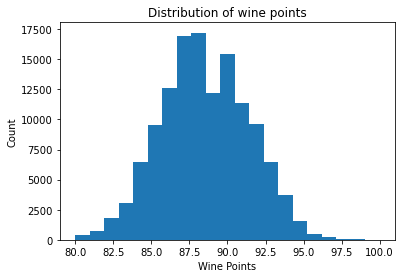

In [38]:
from matplotlib import pyplot as plt

df['points'].plot.hist(bins = df['points'].nunique())
plt.title('Distribution of wine points')
plt.xlabel('Wine Points')
plt.ylabel('Count')
plt.savefig('figa.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

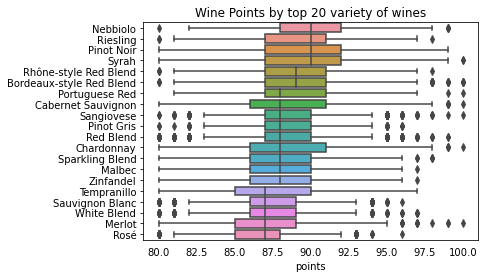

In [12]:
import seaborn as sns
# top most frequent variety
topvar = df['variety'].value_counts()[:20].index

variety_order = df.loc[df['variety'].isin(list(topvar))].groupby('variety')['points'].mean().sort_values(ascending = False).index

variety_bp = sns.boxplot(y = "variety", x = "points", order = variety_order, data = df.loc[df['variety'].isin(list(topvar))])
variety_bp.set_title("Wine Points by top 20 variety of wines")
variety_bp.set(ylabel = "")
variety_bp.tick_params(bottom=False)
plt.savefig('fig1.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")

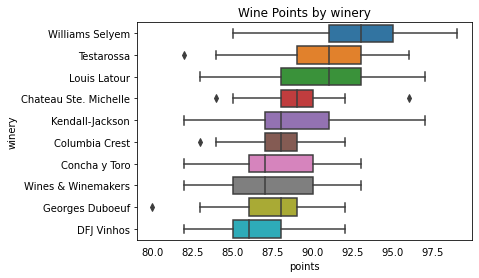

In [39]:
import seaborn as sns

# top most frequent variety
topwinery = df['winery'].value_counts()[:10].index

# sorting from largest mean to lowest mean 
winery_order =  df.loc[df['winery'].isin(list(topwinery))].groupby('winery')['points'].mean().sort_values(ascending = False).index

winery_bp = sns.boxplot(y = "winery", x = "points", order = winery_order, data =  df.loc[df['winery'].isin(list(topwinery))])
winery_bp.set_title("Wine Points by winery")
winery_bp.tick_params(bottom=False)
plt.savefig('figb2.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

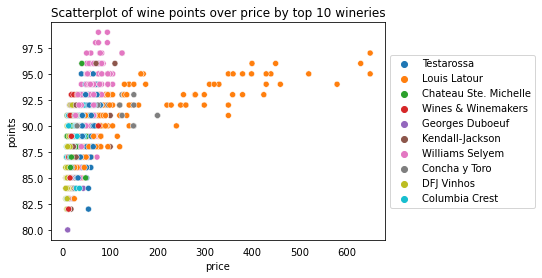

In [14]:
topwinery = df['winery'].value_counts()[:10].index

ppw = sns.scatterplot(x="price", y="points", 
                      data = df.loc[df['winery'].isin(list(topwinery))], hue = 'winery')
ppw.set_title("Scatterplot of wine points over price by top 10 wineries")
ppw.legend(loc ='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ppw.tick_params(bottom=False)
plt.savefig('fig2.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")

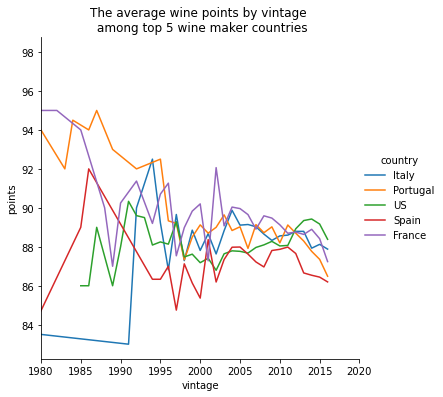

In [16]:
# top most frequent variety
top5country = df['country'].value_counts()[:5].index

pp_plot = sns.relplot(x = "year", y = "points", kind = "line", ci=None,
                      data = df.loc[df['country'].isin(list(top5country))], hue = 'country')
pp_plot.set(title = 'The average wine points by vintage \n among top 5 wine maker countries', xlabel = 'vintage',
           xlim = (1980, 2020))
plt.savefig('fig3.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

Fig.3. The average wine points by vintage among top 5 wine maker countries.

Fig.3 displayes the average wine points by vintage, the year in which the grapes were harvested, among top 5 wine maker countries. It appears that there are some great and not so great years for wine for each country. Additionally, one can see the recently harvested wines from Portugal and France rated lower than the past while the US wines gets rated higher.

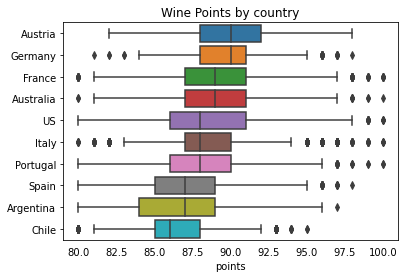

In [40]:
# sorting from largest mean to lowest mean 
top10country = df['country'].value_counts()[:10].index

country_order = df.loc[df['country'].isin(list(top10country))].groupby('country')['points'].mean().sort_values(ascending = False).index

country_bp = sns.boxplot(y = "country", x = "points", order = country_order, data = df.loc[df['country'].isin(list(top10country))])
country_bp.set_title("Wine Points by country")
country_bp.set(ylabel = "")
country_bp.tick_params(bottom=False)
plt.savefig('figb1.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

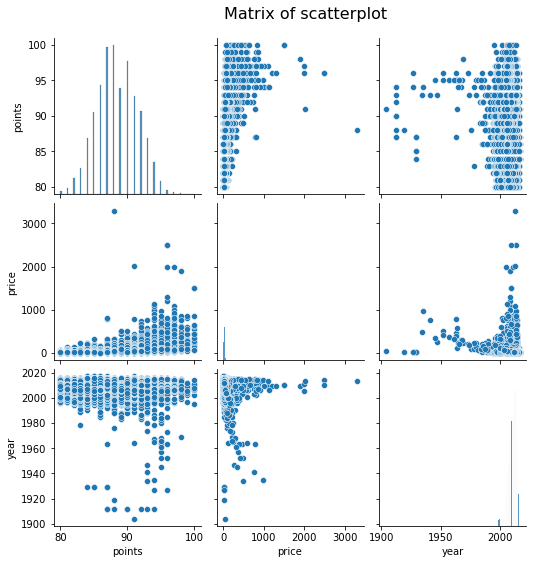

In [131]:
sns.pairplot(df)
plt.title('Matrix of scatterplot', x = -0.5, y=3.2, fontsize = 16)
plt.savefig('figc.png', dpi=300, facecolor ="w", edgecolor ='w',  bbox_inches ="tight")
plt.show()

**Data Preprocessing**

**country, variety, winery** As country cannot be ordered, I chose one-hot encoder.
**year** This variable is reasonably bounded and did not follow the tailed distribution, I used MinMaxScaler to scale the features.
**price** This variable seems to follow the tailed distribution, I used StandardScaler.

In [59]:
# Select the rows
country_top = df['country'].value_counts()[:10].index
var_top = df['variety'].value_counts()[:20].index
winery_top = df['winery'].value_counts()[:30].index

df.loc[df['country'].isin(list(country_top)) == False, 'country'] = "other"
df.loc[df['variety'].isin(list(var_top)) == False, 'variety'] = "other"
df.loc[df['winery'].isin(list(winery_top)) == False, 'winery'] = "other"

C:\Users\Youn Kyeong\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Youn Kyeong\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Youn Kyeong\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [54]:
df.groupby(['country']).size()

country
Argentina     3800
Australia     2329
Austria       3345
Chile         4472
France       22093
Germany       2165
Italy        19540
Portugal      5691
Spain         6645
US           54504
other         5387
dtype: int64

In [60]:
df.groupby(['variety']).size()

variety
Bordeaux-style Red Blend     6915
Cabernet Sauvignon           9472
Chardonnay                  11753
Malbec                       2652
Merlot                       3102
Nebbiolo                     2804
Pinot Noir                  13272
Portuguese Red               2466
Red Blend                    8946
Rhône-style Red Blend        1471
Riesling                     5189
Rosé                         3564
Sangiovese                   2707
Sauvignon Blanc              4967
Sparkling Blend              2153
Syrah                        4142
Tempranillo                  1810
White Blend                  2360
Zinfandel                    2714
other                       37512
dtype: int64

In [57]:
df.groupby(['winery']).size()

winery
Albert Bichot                    117
Casa Santos Lima                 113
Chanson Père et Fils             109
Chateau Ste. Michelle            194
Chehalem                         102
Columbia Crest                   159
Concha y Toro                    164
DFJ Vinhos                       215
Fess Parker                      108
Feudi di San Gregorio            102
Foxen                            105
Gary Farrell                     125
Georges Duboeuf                  196
Iron Horse                       106
Jean-Luc and Paul Aegerter       113
Kendall-Jackson                  130
Louis Jadot                      104
Louis Latour                     199
Lynmar                           118
Maryhill                         102
Montes                           117
Robert Mondavi                   112
Santa Ema                        112
Siduri                           126
Testarossa                       218
Trapiche                         113
Undurraga                      

In [62]:
from sklearn.model_selection import train_test_split
import math



def basic_split(X, y, train_size, val_size, test_size, random_seed = 1001):
    
    global X_train, X_val, X_test, y_train, y_val, y_test
    
    # test the inputs
    if (train_size + val_size + test_size) != 1:
        raise ValueError('Sum of train_size, val_size and test_size is not 1')
        
    elif type(random_seed) != int:
        raise ValueError('random_seed is not an integer')
        
    else:
    # first split to separate out the training set
        X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = train_size, random_state = random_seed)
    
    # second split to separate out the validation and test sets
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = val_size/(1 - train_size), 
                                                    test_size = test_size/(1 - train_size), random_state = random_seed)
    
    # test the outputs
    assert X_train.shape == (math.floor(X.shape[0]*train_size), X.shape[1])
    assert X_val.shape == (math.floor(X.shape[0]*val_size), X.shape[1])
    assert X_test.shape == ((X.shape[0] - (X_train.shape[0] + X_val.shape[0])), X.shape[1])
    
    print('X_train set', X_train.head(), X_train.shape)
    print('X_validation set', X_val.head(), X_val.shape)
    print('X_test set', X_test.head(), X_test.shape)


In [ ]:
# split the data
y = df['points']
X = df.loc[:, df.columns != 'points']
basic_split(X, y, train_size = 0.6, val_size = 0.2, test_size = 0.2)

In [121]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


# collect which encoer to use on each feature
onehot_ftrs = ['country', 'variety', 'winery']
std_ftrs = ['year', 'price']

for i in range(5):

    final_df = []
    
    tvt_dict = {'train':[], 'validation':[], 'test':[]}
    
       # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers = [
            ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])
    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    # Preprocessed dataframe
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
       
     # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers = [
            ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])
    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
       
    # Preprocessed dataframe
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    # save to dictionary
    tvt_dict['train'].append([X_train_prep, y_train])
    tvt_dict['validation'].append([X_val_prep, y_val])
    tvt_dict['test'].append([X_test_prep, y_test])
        
    final_df.append(tvt_dict)
    
print(X_train.shape)

(77982, 5)


In [77]:
final_df

[{'train': [[array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
             0.92035398,  0.83045609],
           [ 0.        ,  0.        ,  0.        , ...,  1.        ,
             0.92920354,  0.42206875],
           [ 0.        ,  0.        ,  0.        , ...,  1.        ,
             0.96460177,         nan],
           ...,
           [ 0.        ,  0.        ,  0.        , ...,  1.        ,
             0.94690265, -0.49079708],
           [ 0.        ,  0.        ,  0.        , ...,  1.        ,
             0.96460177, -0.41872872],
           [ 0.        ,  0.        ,  0.        , ...,  1.        ,
             0.9380531 ,  0.35000039]]),
    26609     89
    6696      91
    39775     84
    51393     85
    41289     86
              ..
    65038     86
    114974    98
    79037     87
    52105     88
    80749     90
    Name: points, Length: 77982, dtype: int64]],
  'validation': [[array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
      

In [122]:
len(list(final_df[0].values())[0][0][0][0])

62